In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

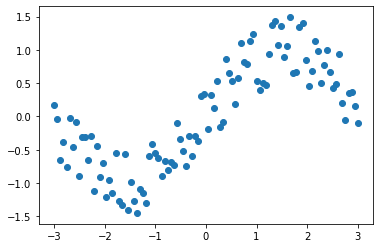

In [2]:
# let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1,1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, .5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [3]:
#tf.placeholders:
# for the input and output of the network.
# placeholders are variables which we need to fill in when we are ready to compute the graph
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [4]:
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
y_pred = tf.add(tf.multiply(X,W), b)

In [5]:
# loss function will measure the distance between our observations and predictions and average over them
cost = tf.reduce_sum(tf.pow(y_pred -Y, 2)) / (n_observations - 1)

In [6]:
# using gradient descent to optimize W, b performs a single step in the negative  gradient
learning_rate = 0.01
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0803 20:43:07.716737 140505514452800 deprecation.py:323] From /home/nil/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# we create a session
n_epochs = 100
with tf.Session() as sess:
    # here we tell tensorflow that  we want to initialize all the variables in the graph so we can use them
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/tensorflowlogs", sess.graph)
    sess.run(tf.global_variables_initializer())
    
    #fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x,y) in zip(xs, ys):
            sess.run(optimizer,feed_dict={X:x, Y:y})
        
        training_cost = sess.run(cost,
                                 feed_dict={X:xs, Y:ys})
        
        print(training_cost)
        
        if epoch_i % 20 == 0:
            ax.plot(xs,
                    y_pred.eval(feed_dict ={X:xs},
                                session = sess),
                    'k',
                    alpha = epoch_i/n_epochs)
            fig.show()
            plt.draw()
        
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
        
    writer.close()
    
#ax.set_ylim([-3, 3])
fig.show()
plt.waitforbuttonpress()

1.7781955
1.6075608
1.4567071
1.3233336
1.2054088
1.1011375
1.008933
0.9273927
0.8552782
0.7914945
0.73507434
0.6851626
0.64100385
0.60193056
0.56735265
0.536749
0.50965875
0.48567468
0.4644369
0.4456275
0.4289654
0.41420218
0.40111834
0.38952005
0.37923542
0.3701132
0.36201912
0.35483488
0.34845588
0.34278935
0.3377536
0.3332763
0.32929346
0.32574847
0.3225914
0.31977805
0.31726933
0.31503046
0.31303102
0.31124383
0.3096451
0.30821356
0.30693045
0.3057792
0.30474508
0.30381513
0.3029779
0.3022231
0.30154172
0.3009258
0.30036825
0.29986268
0.29940364
0.2989861
0.29860574
0.29825872
0.2979414
0.2976509
0.29738438
0.29713944
0.29691398
0.29670602
0.29651383
0.296336
0.29617104
0.29601786
0.29587528
0.29574233
0.29561824
0.2955022
0.29539344
0.2952914
0.29519555
0.29510537
0.29502037
0.29494017
0.29486445
0.29479274
0.2947249
0.2946606
0.29459953
0.29454157
0.29448646
0.29443398
0.294384
0.2943364
0.29429096
0.29424763
0.2942062
0.29416662
0.2941288
0.2940926
0.29405794
0.29402477
0.29399